<a href="https://colab.research.google.com/github/johnsDevassy/Worked_Projects/blob/master/Twitter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweepy
import sys,tweepy
import pandas as pd

In [4]:
apikey="V75GOhK6KVSbtJJE0r2IXBcHx"
apikeysec="akwFwthwrhESPStgZ7CCAndPxXSIU5nIkbkMPsQL1HHS777nYw"
api_token="AAAAAAAAAAAAAAAAAAAAAMdkHwEAAAAAm%2B9cWlQxyeuQeDAfaflLvg1tfO4%3DzTunnYo7QCZ0ehVWq8rEeS8TmcJsAvZn1z6gbnn5dlhzobgYmi"
beart="AAAAAAAAAAAAAAAAAAAAAMdkHwEAAAAAf5TpRN8A6uNS195wM9XexiXDQ90%3DtcCI6H0uTC7FjydZ3ETNscUT7B1J15po2EUYKu4Jl5c75T5l0i"
accesstoken="1303588439208722432-SZ3MJnyz7YYcG1sT8C3KlYwr6iYhRI"
accesstokensec="XhkWhhsT8KEGmPHWro87lwv620K1hH0Evu5qZkySEBW4F"

In [5]:
def getauth():
  auth=tweepy.OAuthHandler(apikey,apikeysec)
  auth.set_access_token(accesstoken,accesstokensec)
  return auth
  

In [6]:
auth=getauth()
client=tweepy.API(auth,wait_on_rate_limit = True)

df = pd.DataFrame(columns=['text'])
msgs = []
msg =[]

In [7]:
for tweet in tweepy.Cursor(client.search,q='#oneplusnord -filter:retweets',rpp=100,lang='en').items(1000):
  if not tweet.retweeted and ( "RT @" not in tweet.text):
    msg = tweet.text
    msgs.append(msg)

In [8]:
TotalTweets=msgs
len(TotalTweets)

297

In [9]:
for i in range(len(TotalTweets)):
  TotalTweets[i]=removepun(TotalTweets[i])


['@OnePlus_IN \nHey there! I am user of OnePlus NORD device since September 2020 you have been rolled out many updates… https://t.co/WKPEeAnWS3',
 "@OnePlus_UK trying to get a new screen protector for Nord and you don't supply it for UK and irish customers?? Why… https://t.co/5GXmiqZHmm",
 '#oneplus launcher or #novalauncher ? @OnePlus \n#OnePlusnord',
 'Night shoot #shotononeplus #OnePlusNord @OnePlus_IN #NaturePhotography    full moon https://t.co/NwQPOxXQdM',
 'Hi, looking for #OnePlusNord reviews \nHas anyone used this one?',
 'View 🖤 #shotononeplus  #OneplusNord @OnePlus_IN #MumbaiT2InternationalAirport #NightscapeMode https://t.co/UcUjzVO2uW',
 '@oneplus @OnePlus_IN Thank you for Nightscape!\n#shotononeplus #OnePlusNord https://t.co/wezsz5kTJL',
 'Although I know you "Never Settle" but is there any way we can Settle this because I am not able to say No to No-Rd… https://t.co/9kQ0cVoqdT',
 'This cricket season, love the sport and the medium! Shop at your nearest Croma store or vis

In [10]:
texttweets=[t for t in TotalTweets]

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
tokenized=[word_tokenize(t) for t in texttweets]
tokenized[0]

In [ ]:
tokenized[1]

['#',
 'Trump',
 'is',
 'already',
 'demanding',
 'a',
 'vote',
 'without',
 'delay',
 'for',
 'his',
 '#',
 'SupremeCourt',
 'nominee',
 '!',
 '#',
 'RuthBaderGinsburg',
 'just',
 'died',
 'LAST',
 'N…',
 'https',
 ':',
 '//t.co/8qKOboq0Qh']

In [ ]:
tokenized[2]

['@',
 'robbystarbuck',
 '@',
 'tamarakeithNPR',
 '@',
 'PressSec',
 'gave',
 'a',
 'different',
 'version',
 'of',
 '#',
 'Trump',
 'hearing',
 'the',
 'news',
 'for',
 'the',
 '1st',
 'time',
 'when…',
 'https',
 ':',
 '//t.co/jbeX4KuV6W']

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
cars='εδώΔίτουπαρουσίασηΩμ!"#$%&\'*+,/:;<=>?@[\\]^_`{|}~'
def preprocess(texts):
  sp_words=set(stopwords.words('english'))
  def remove_punctuation(tokens):
    return [token.lower() for token in tokens if token.lower() not in sp_words and token.lower() not in punctuation ]
  return [remove_punctuation(text) for text in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
preprocessed=preprocess(tokenized)
sp_words=set(stopwords.words('english'))
# print(sp_words)
def remove_punctuation(tokens):
    return [token.lower() for token in tokens if token not in sp_words and token not in punctuation ]
k="I have a problem on this question I should've . .. ... # what are this is a problem ok bye i don't know ll "
re=remove_punctuation(word_tokenize(k))
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
preprocessed[74]

['filltheseat',
 'realdonaldtrump',
 'filltheseat',
 'trump2020landslidevictory',
 'turnnewyorkcityred',
 'turnnewyorkstatered…',
 'https',
 '//t.co/ftyopk1mrb']

In [ ]:
# stopwords.words('english')

In [ ]:
#goodthing done till now. Remove links . Regular expressions. buut first lemmatize I guess


In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer =WordNetLemmatizer()
def lem(tw):
  return [lemmatizer.lemmatize(t,get_wordnet_pos(t)) for t in tw]
lemmatized =[lem(twee) for twee in preprocessed] 

In [ ]:
#niceaayt pani paliya lemmetizer
# print(lemmatizer.lemmatize('studying',get_wordnet_pos('studying'))
# lemmatized.remove('nord')
# lemmatized.remove('plus')
# lemmatized.remove('one')
# lemmatized.remove('oneplus')
# lemmatized.remove('oneplusnord')
lemmatized[74]

['filltheseat',
 'realdonaldtrump',
 'filltheseat',
 'trump2020landslidevictory',
 'turnnewyorkcityred',
 'turnnewyorkstatered…',
 'http',
 '//t.co/ftyopk1mrb']

In [ ]:
list1=['nord','oneplus','http','one','oneplusbuds','oneplusnord','...',"'s",'’','plus','phone','de','also','galaxy','price','oneplus_in',"n't",'lenovo','playapex','x','philippine','un','amp','youtube','que']

In [ ]:
from collections import Counter 
flatList = [w for subList in lemmatized for w in subList]
print(flatList[0:20])
flatList=[s for s in flatList if s not in list1]
# for w in most_occur:
#   flatList.remove(w)
# counter = Counter(flatList) 
# most_occur = counter.most_common(20) 
print(flatList[0:20])

['believe', '2020', 'go', 'year', 'america', 'second', 'civil', 'war', 'nominate', 'another', 'conservative', 'the…', 'http', '//t.co/4uejttq74j', 'trump', 'already', 'demand', 'vote', 'without', 'delay']
['believe', '2020', 'go', 'year', 'america', 'second', 'civil', 'war', 'nominate', 'another', 'conservative', 'the…', '//t.co/4uejttq74j', 'trump', 'already', 'demand', 'vote', 'without', 'delay', 'supremecourt']


In [ ]:
counter = Counter(flatList) 
most_occur = counter.most_common(20) 
print(most_occur)

[('trump', 728), ('realdonaldtrump', 114), ('gop', 88), ('``', 58), ('president', 57), ('ginsburg', 53), ('republican', 51), ("''", 45), ('la', 44), ('rbg', 43), ('court', 42), ('biden', 41), ('make', 40), ('election', 40), ('go', 39), ('america', 37), ('“', 37), ('scotus', 37), ('democrat', 37), ('obama', 36)]


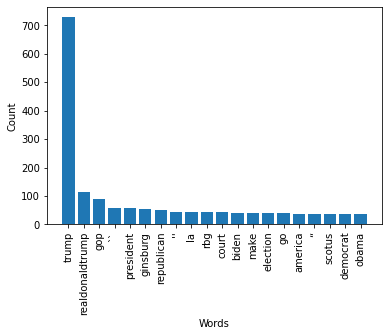

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
x,y = zip(*most_occur)
plt.bar(x,y)
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.draw()

[(('realdonaldtrump', 'gop'), 46), (('supreme', 'court'), 32), (('ruth', 'bader'), 19), (('president', 'trump'), 19), (('bader', 'ginsburg'), 18), (("'without", 'delay'), 16), (('court', 'justice'), 14), (('realdonaldtrump', 'trump'), 14), (('republican', 'party'), 13), (('vote', 'trump'), 12), (('without', 'delay'), 11), (('trump', 'biden'), 11), (('trump', 'say'), 11), (('trump', 'gop'), 11), (('gop', '2016'), 10), (('2016', 'presidency'), 10), (('presidency', 'obama'), 10), (('obama', 'republican'), 10), (('party', 'found'), 10), (('found', '237'), 10)]
dict_values([46, 32, 19, 19, 18, 16, 14, 14, 13, 12, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10])


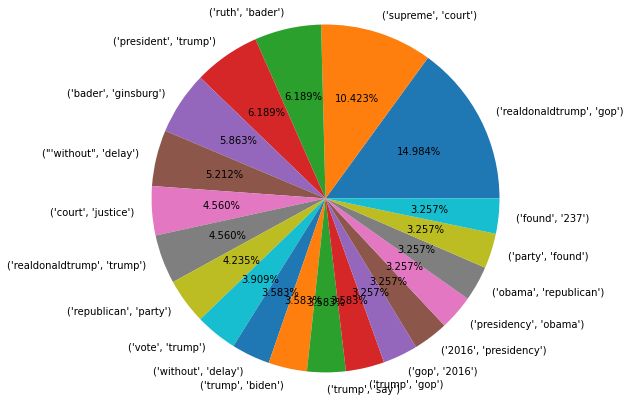

In [ ]:
from nltk.util import ngrams 
n_grams = 2
x = dict(Counter(ngrams(flatList, n_grams)))
print(sorted(x.items(), key = lambda item:item[1], reverse=True)[:20])
y = {k:x[k] for (k,v) in sorted(x.items(), key = lambda item:item[1], reverse=True)[:20]}
print(y.values())
plt.pie(y.values(), labels = y.keys(), radius = 2,autopct='%1.3f%%')
plt.show()